![Movie popcorn on red background](https://media.istockphoto.com/id/1396537282/fr/photo/pop-corn.jpg?s=612x612&w=0&k=20&c=YSSGpAuMkcA-Eu3UyErz8O8gIzW1aSoLS6H3_e0VvwU=)

## Introduction

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

## Context

Your friend suspects that movies are getting shorter and they've found some initial evidence of this. Having peaked your interest, you will perform exploratory data analysis on the `netflix_data.csv` data to understand what may be contributing to movies getting shorter over time. Your analysis will follow these steps:

1. Load the CSV file and store as `netflix_df`.
2. Filter the data to remove TV shows and store as `netflix_subset`.
3. Investigate the Netflix movie data, keeping only the columns "`title`", "`country`", "`genre`", "`release_year`", "`duration`", and saving this into a new DataFrame called `netflix_movies`.
4. Filter netflix_movies to find the movies that are shorter than 60 minutes, saving the resulting DataFrame as `short_movies`; inspect the result to find possible contributing factors.
5. Using a for loop and `if/elif` statements, iterate through the rows of `netflix_movies` and assign colors of your choice to four genre groups ("`Children`", "`Documentaries`", "`Stand-Up`", and "`Other`" for everything else). Save the results in a colors list. Initialize a figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels "`Release year`" for the x-axis, "`Duration (min)`" for the y-axis, and the title "`Movie Duration by Year of Release`".
6. After inspecting the plot, answer the question "Are we certain that movies are getting shorter?" by assigning either "`yes`", "`no`", or "`maybe`" to the variable answer.
7. Click the "Submit Project" button to check your solution.

## The data

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

* **netflix_data.csv**

| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!

1. Load the CSV file and store as `netflix_df`.


In [2]:
CSV_PATH = './data/raw/netflix_data.csv'
netflix_df = pd.read_csv(CSV_PATH)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


2. Filter the data to remove TV shows and store as `netflix_subset`.


In [3]:
netflix_subset = netflix_df[netflix_df['type'] == 'Movie'].drop('type', axis=1)
netflix_subset.head()

,show_id,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


3. Investigate the Netflix movie data, keeping only the columns "`title`", "`country`", "`genre`", "`release_year`", "`duration`", and saving this into a new DataFrame called `netflix_movies`.


In [4]:
netflix_movies = netflix_subset[['title', 'country', 'genre', 'release_year', 'duration']]
netflix_movies.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


4. Filter netflix_movies to find the movies that are shorter than 60 minutes, saving the resulting DataFrame as `short_movies`; inspect the result to find possible contributing factors.


In [5]:
short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies.head()

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28


5. Using a for loop and `if/elif` statements, iterate through the rows of `netflix_movies` and assign colors of your choice to four genre groups ("`Children`", "`Documentaries`", "`Stand-Up`", and "`Other`" for everything else). Save the results in a colors list. Initialize a figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels "`Release year`" for the x-axis, "`Duration (min)`" for the y-axis, and the title "`Movie Duration by Year of Release`".


In [6]:
COLORS_BY_GENRE = {
    'Children': 'blue',
    'Documentaries': 'yellow',
    'Stand-Up': 'red',
    # 'Other': 'green'
}

colors = [COLORS_BY_GENRE[row['genre']] if row['genre'] in COLORS_BY_GENRE.keys() else 'green' for _, row in netflix_movies.iterrows()]

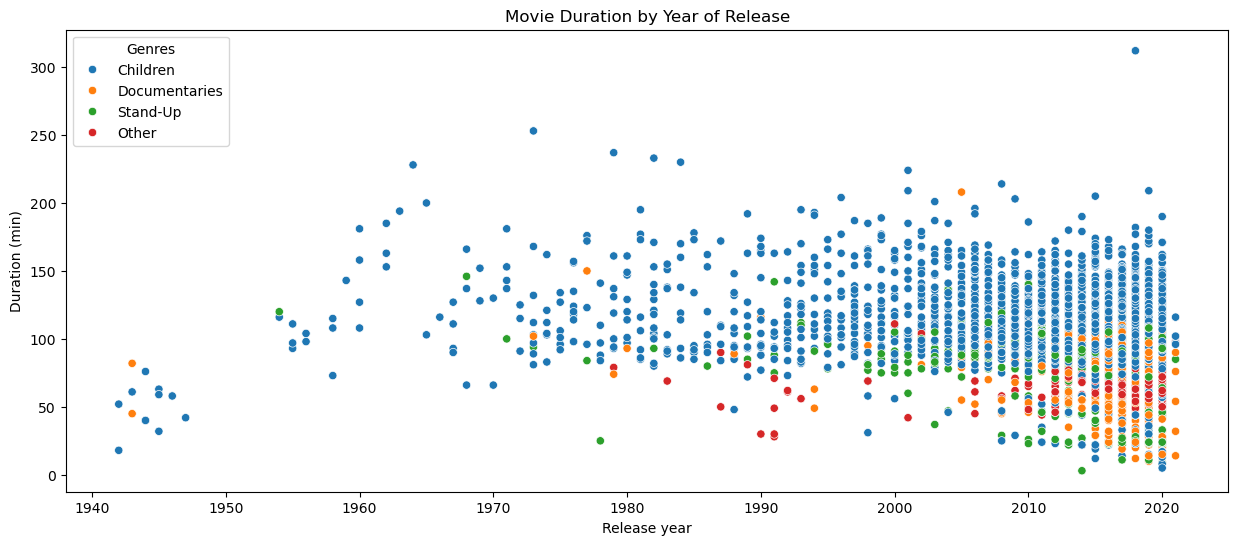

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.scatterplot(netflix_movies,
                x='release_year',
                y='duration',
                hue=colors)

plt.title('Movie Duration by Year of Release')
plt.xlabel('Release year')
plt.ylabel('Duration (min)')

legend_handles, _= ax.get_legend_handles_labels()
ax.legend(title='Genres',
          handles=legend_handles,
          labels=[*list(COLORS_BY_GENRE.keys()), 'Other'])

6. After inspecting the plot, answer the question "Are we certain that movies are getting shorter?" by assigning either "`yes`", "`no`", or "`maybe`" to the variable answer.


In [9]:
# Actually, it can be said that numereous new movies has been release in the
# past few years. The number of movies with short duration increse as weel over
# the years - but it seems to hava some estability in duration metric. Therefore,
# would not be precise to say, at once, that there is a new tendency to new movies
# with shorter duration.
# Worth to note that, in the 2020 year, maybe for low data avaibility, the number
# of short movies is considerable.

answer = 'maybe'

7. Click the "Submit Project" button to check your solution.